In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
#Load the Dataset
netflix_data = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")

In [6]:
# Display the first few rows
print(netflix_data.head())

# Summary statistics
print(netflix_data.describe())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [5]:
# Info on columns and data types
print(netflix_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [7]:
# Check for missing values
print(netflix_data.isnull().sum())

# For simplicity, drop rows with missing values (you can also fill them)
netflix_data = netflix_data.dropna()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


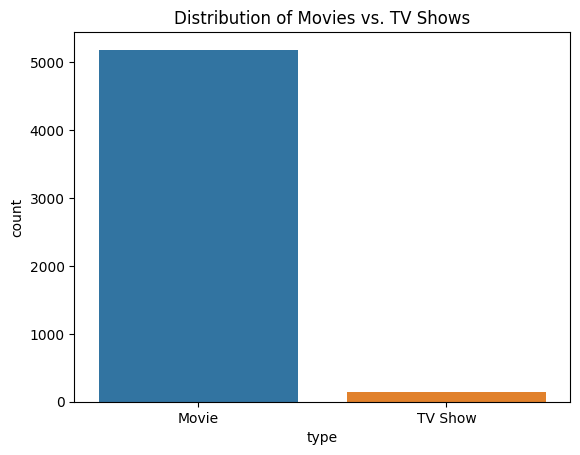

In [8]:
#Exploratory Data Analysis (EDA)
#Distribution of Movies vs. TV Shows

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="type", data=netflix_data)
plt.title("Distribution of Movies vs. TV Shows")
plt.show()

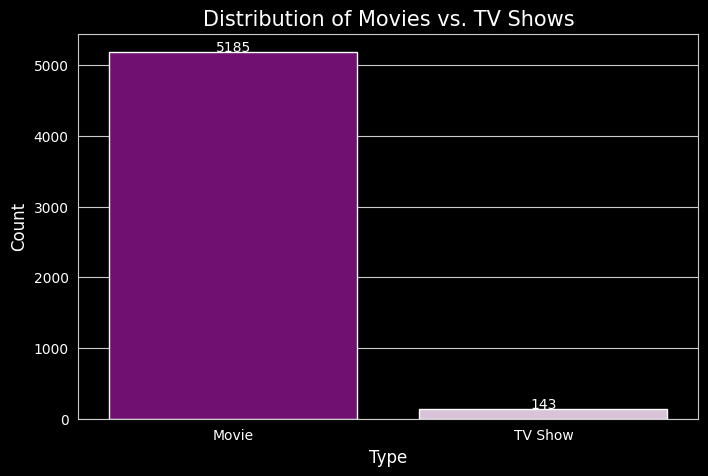

In [21]:
# Using ChatGPT for a visual enhancement
# Custom color palette
palette = {
    "Movie": sns.light_palette("purple", reverse=True)[0],
    "TV Show": sns.light_palette("purple", reverse=True)[-2]
}

# Setting the figure size and black background
plt.figure(figsize=(8,5), facecolor='black')

ax = sns.countplot(x="type", data=netflix_data, palette=palette)

# Black background for the axis
ax.set_facecolor('black')

# Adding the count on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3,
            '{:1.0f}'.format(height), ha="center", color='white')

# Title and labels settings
plt.title("Distribution of Movies vs. TV Shows", color='white', fontsize=15)
ax.set_xlabel('Type', color='white', fontsize=12)
ax.set_ylabel('Count', color='white', fontsize=12)
ax.tick_params(colors='white')

# Displaying the plot
plt.show()

# Resetting the style after plotting
sns.set_style("whitegrid")

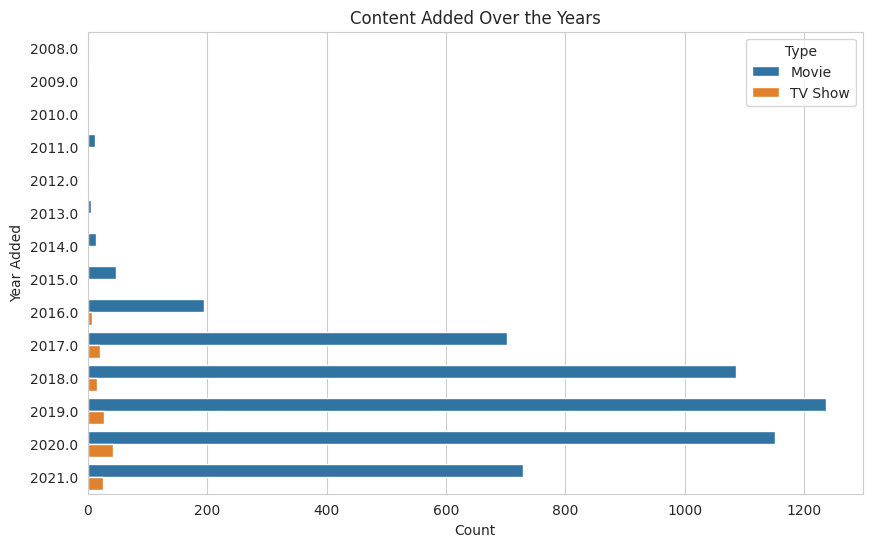

In [15]:
#Growth of Netflix Content Over Years
# Drop rows where 'date_added' is NaN
netflix_data = netflix_data.dropna(subset=['date_added'])

# Convert 'date_added' to datetime format and extract the year
netflix_data['year_added'] = pd.to_datetime(netflix_data['date_added'], errors='coerce').dt.year

# Drop rows where 'year_added' is NaN after conversion (in case of malformed dates)
netflix_data = netflix_data.dropna(subset=['year_added'])
plt.figure(figsize=(10,6), facecolor='white')

# Order of years
years_order = sorted(netflix_data['year_added'].unique())

ax = sns.countplot(y="year_added", data=netflix_data, hue="type", order=years_order)

# Title and other settings
plt.title("Content Added Over the Years")
plt.xlabel('Count')
plt.ylabel('Year Added')
plt.legend(title='Type')

plt.show()

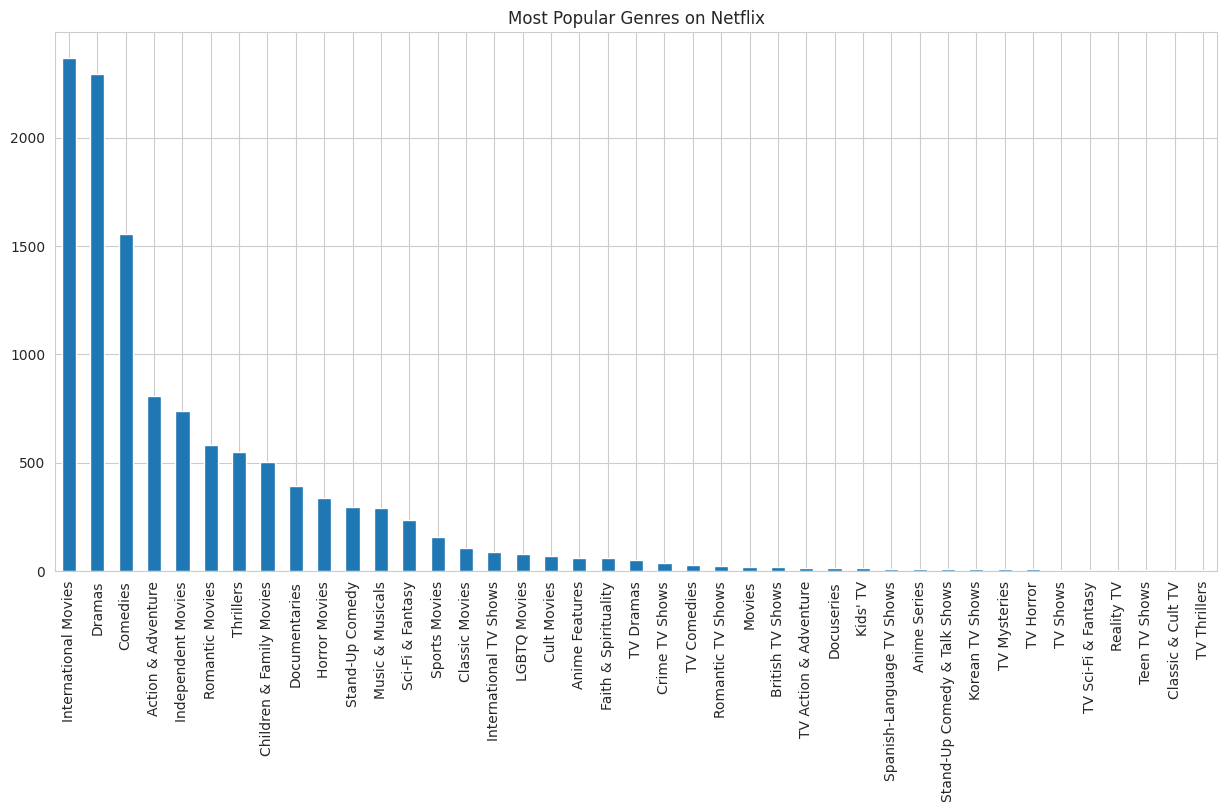

In [16]:
#Most Popular Genres
# Splitting 'listed_in' to count genres might be tricky due to multiple genres in one row.
# Here's a simple way:

genres = netflix_data['listed_in'].str.split(',', expand=True).stack().str.strip().value_counts()
genres.plot(kind='bar', figsize=(15,7))
plt.title("Most Popular Genres on Netflix")
plt.show()

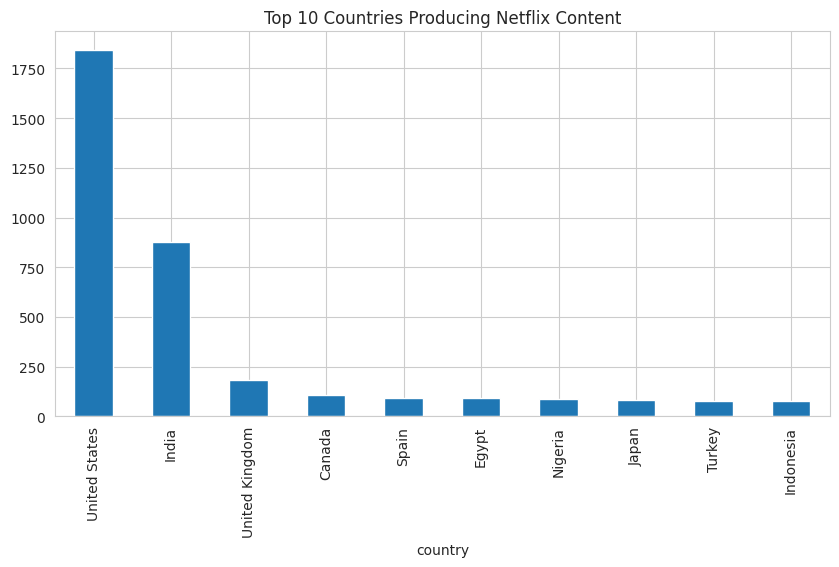

In [18]:
#Countries Producing the Most Content
top_countries = netflix_data['country'].value_counts().head(10)
top_countries.plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Countries Producing Netflix Content")
plt.show()

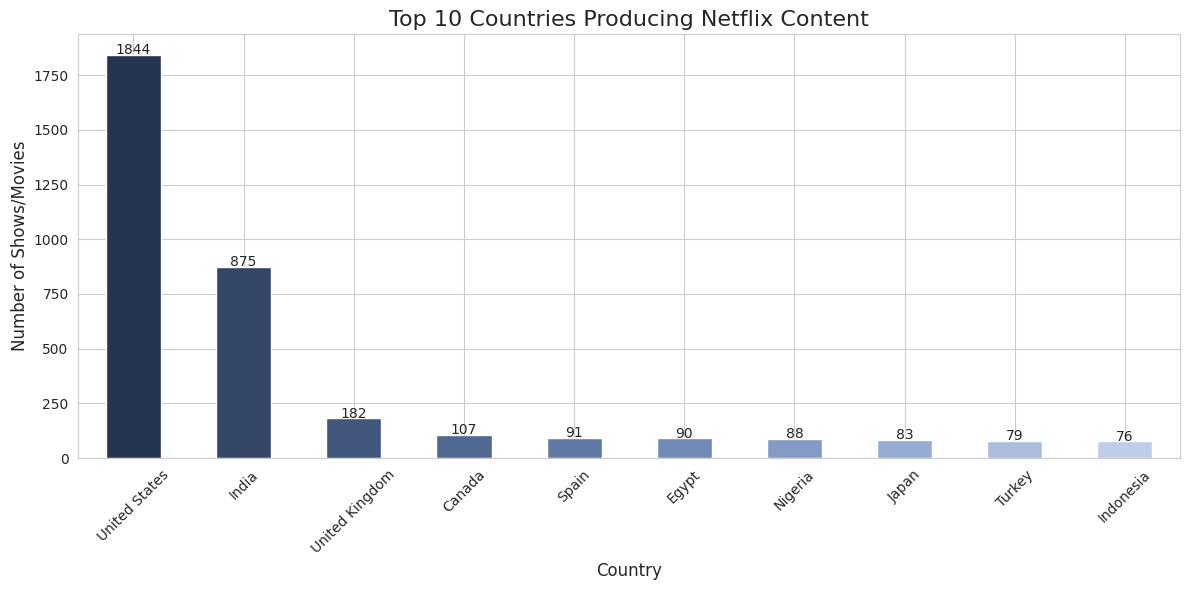

In [20]:
# Using ChatGPT for a visual enhancement
# Create gradient color palette
colors = sns.cubehelix_palette(start=2.8, rot=0, dark=0.2, light=0.8, reverse=True, n_colors=10)

# Plot
plt.figure(figsize=(12,6), facecolor='white')
ax = top_countries.plot(kind='bar', color=colors)

# Set the title
plt.title("Top 10 Countries Producing Netflix Content", fontsize=16)

# Display count on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 3, int(height), ha='center', fontsize=10)

# X and Y labels
plt.ylabel('Number of Shows/Movies', fontsize=12)
plt.xlabel('Country', fontsize=12)

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

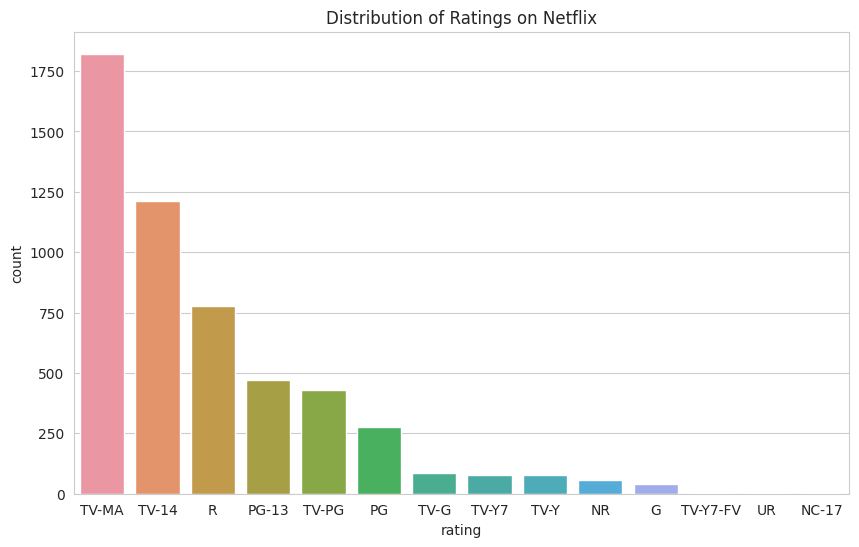

In [22]:
# Ratings Distribution
plt.figure(figsize=(10,6))
sns.countplot(x="rating", data=netflix_data, order=netflix_data['rating'].value_counts().index)
plt.title("Distribution of Ratings on Netflix")
plt.show()

/tmp/ipykernel_32/2584310264.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration'] = movies['duration'].str.split().str[0].astype(int)


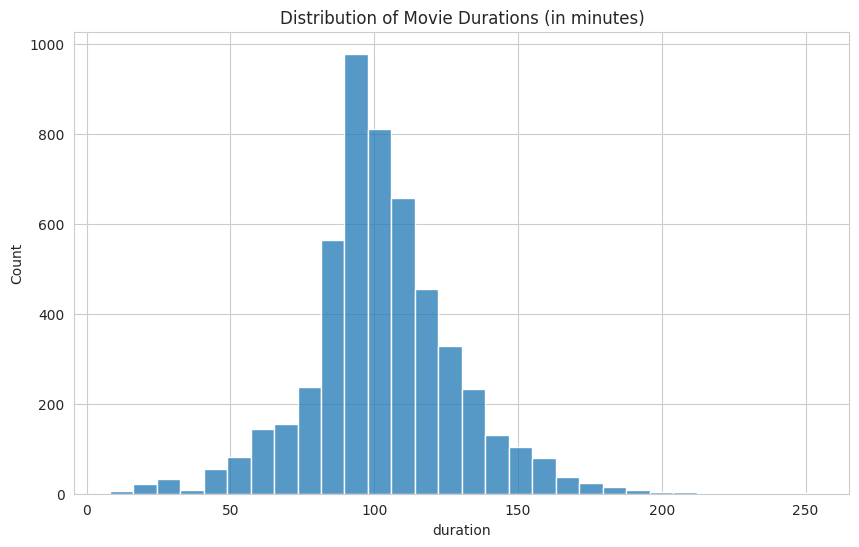

In [23]:
# Duration of Movies
# Filter out movies
movies = netflix_data[netflix_data['type'] == 'Movie']

# Extract numeric duration
movies['duration'] = movies['duration'].str.split().str[0].astype(int)

plt.figure(figsize=(10,6))
sns.histplot(movies['duration'], bins=30)
plt.title("Distribution of Movie Durations (in minutes)")
plt.show()

/tmp/ipykernel_32/1901161680.py:6: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(movies['duration'], fill=True, color='purple', shade_lowest=True, kernel='gau', bw_adjust=0.25)
/tmp/ipykernel_32/1901161680.py:6: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(movies['duration'], fill=True, color='purple', shade_lowest=True, kernel='gau', bw_adjust=0.25)


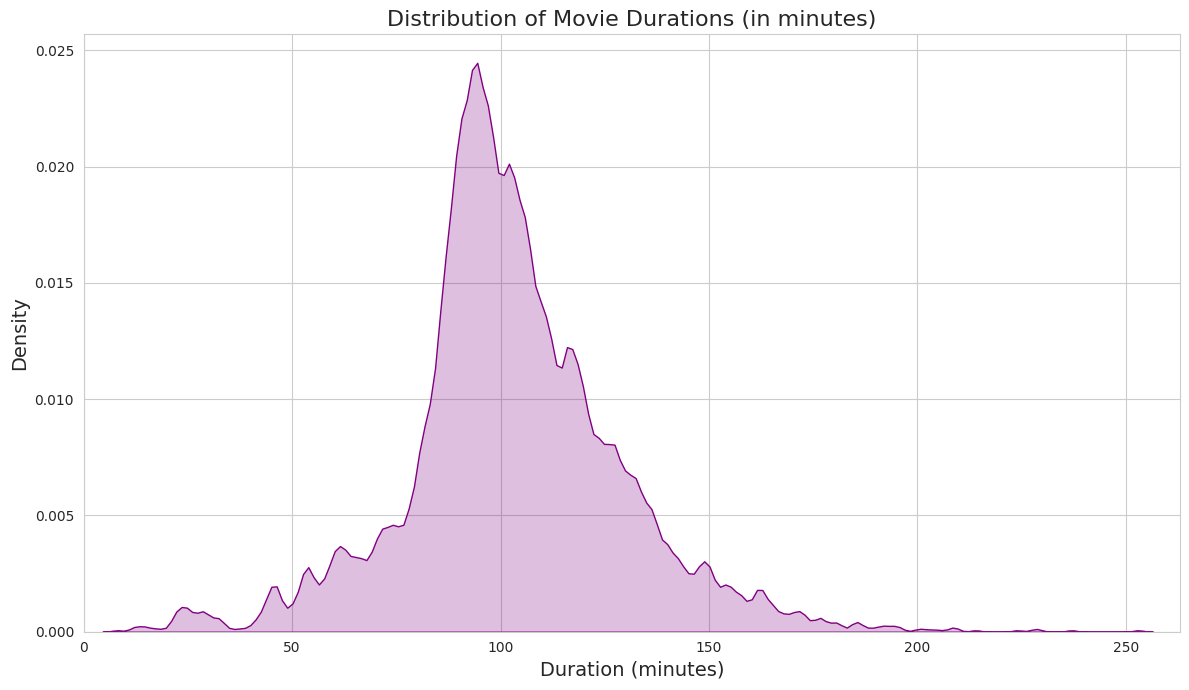

In [24]:
# Set up the visual environment
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7), facecolor='white')

# Create a KDE plot
sns.kdeplot(movies['duration'], fill=True, color='purple', shade_lowest=True, kernel='gau', bw_adjust=0.25)

# Enhancements
plt.title("Distribution of Movie Durations (in minutes)", fontsize=16)
plt.xlabel('Duration (minutes)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.xlim(0, movies['duration'].max() + 10)  # Setting the x-axis limits to enhance visual clarity

# Display the plot
plt.tight_layout()
plt.show()

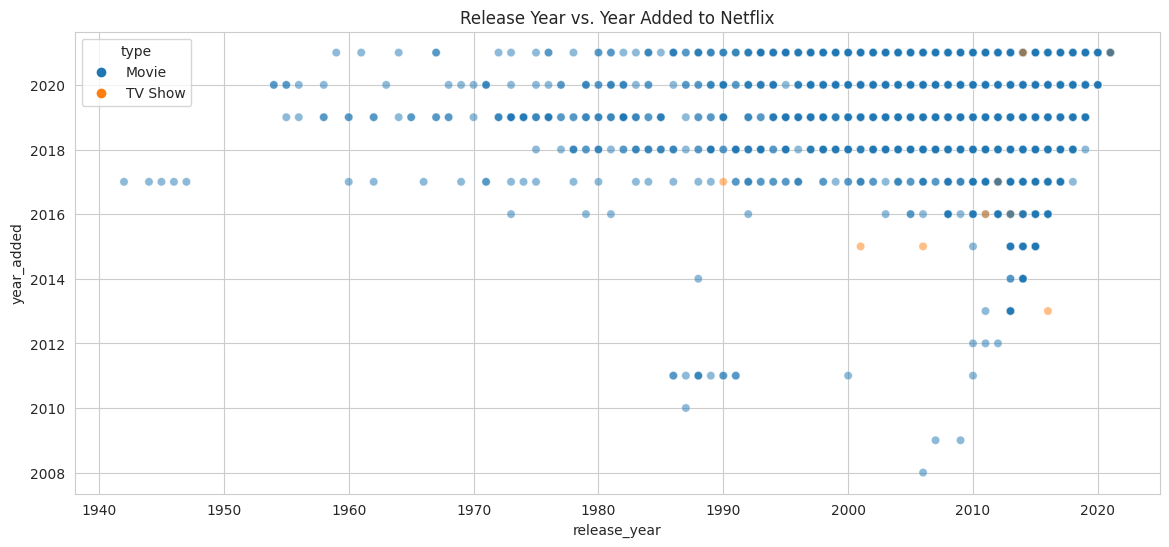

In [25]:
# Relationship Between Release Year and Year Added to Netflix
# Extract release year
netflix_data['release_year'] = netflix_data['release_year'].astype(int)

plt.figure(figsize=(14,6))
sns.scatterplot(x='release_year', y='year_added', hue='type', data=netflix_data, alpha=0.5)
plt.title("Release Year vs. Year Added to Netflix")
plt.show()

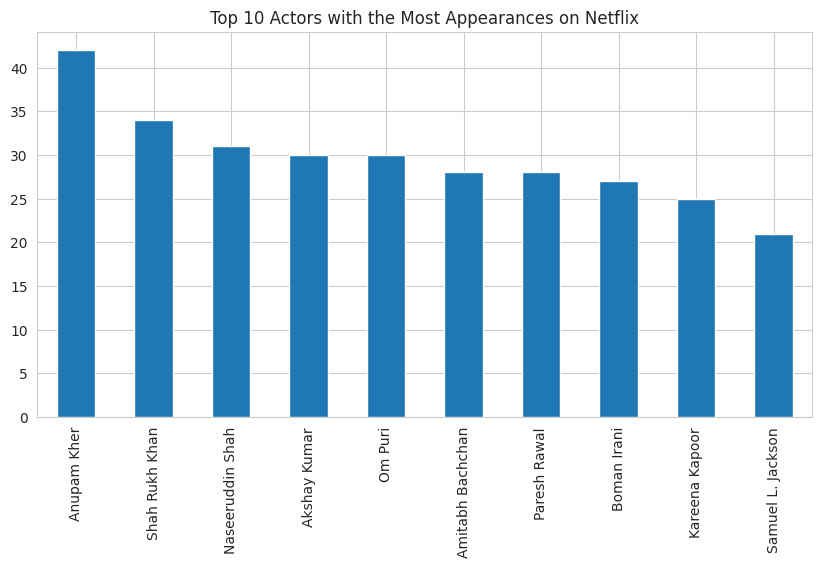

In [26]:
# Which actors appear most frequently on Netflix?
top_actors = netflix_data['cast'].str.split(',', expand=True).stack().str.strip().value_counts().head(10)
top_actors.plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Actors with the Most Appearances on Netflix")
plt.show()

In [27]:
# Display the top actors and their counts
print("Top 10 Actors with the Most Appearances on Netflix:")
for actor, count in top_actors.items():
    print(f"{actor}: {count}")

Top 10 Actors with the Most Appearances on Netflix:
Anupam Kher: 42
Shah Rukh Khan: 34
Naseeruddin Shah: 31
Akshay Kumar: 30
Om Puri: 30
Amitabh Bachchan: 28
Paresh Rawal: 28
Boman Irani: 27
Kareena Kapoor: 25
Samuel L. Jackson: 21


/tmp/ipykernel_32/2627985170.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['duration'] = tv_shows['duration'].str.split().str[0].astype(int)


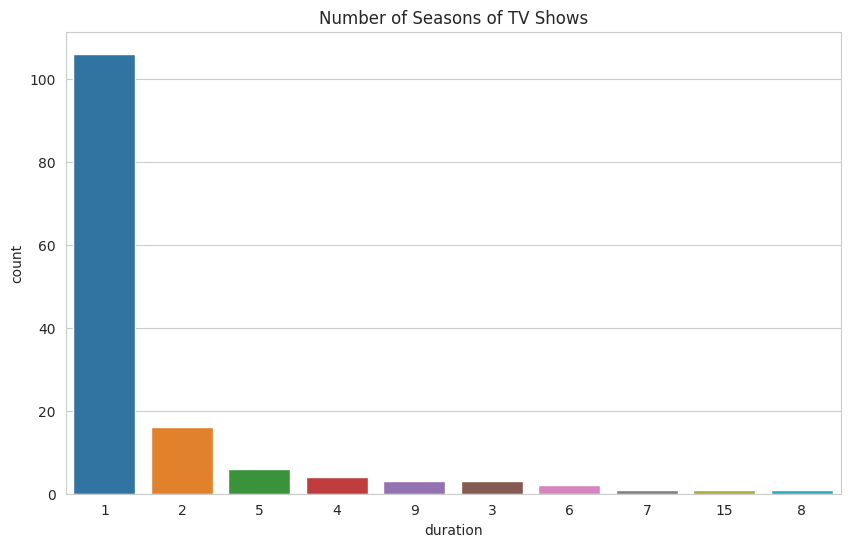

In [28]:
# Duration of TV Shows
# Filter out TV shows
tv_shows = netflix_data[netflix_data['type'] == 'TV Show']

# Extract numeric duration (in terms of seasons)
tv_shows['duration'] = tv_shows['duration'].str.split().str[0].astype(int)

plt.figure(figsize=(10,6))
sns.countplot(x='duration', data=tv_shows, order=tv_shows['duration'].value_counts().index)
plt.title("Number of Seasons of TV Shows")
plt.show()

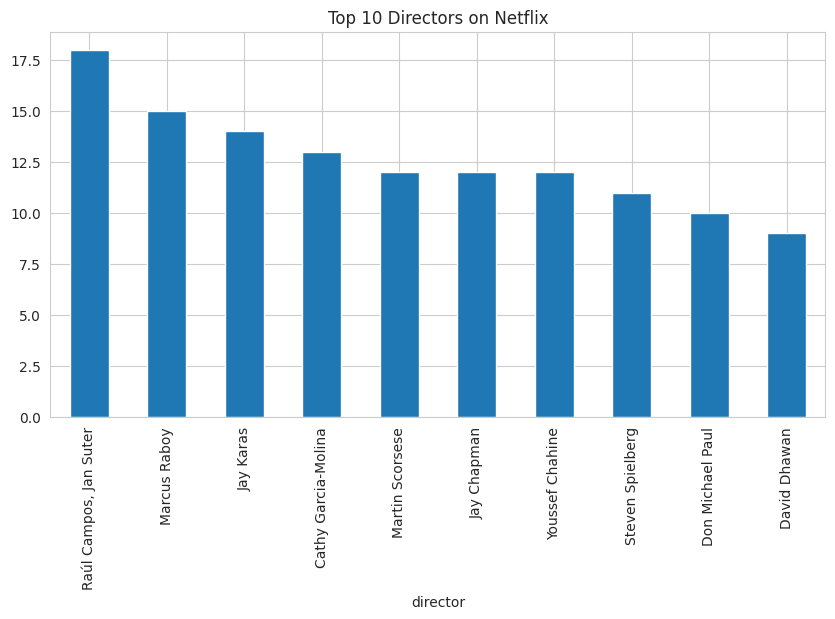

In [29]:
# Directors with the Most Content
# Who are the top directors on Netflix based on the number of titles?

top_directors = netflix_data['director'].value_counts().head(10)
top_directors.plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Directors on Netflix")
plt.show()

In [30]:
# Display the top actors and their counts
print("Top 10 Directors on Netflix:")
for director, count in top_directors.items():
    print(f"{director}: {count}")

Top 10 Directors on Netflix:
Raúl Campos, Jan Suter: 18
Marcus Raboy: 15
Jay Karas: 14
Cathy Garcia-Molina: 13
Martin Scorsese: 12
Jay Chapman: 12
Youssef Chahine: 12
Steven Spielberg: 11
Don Michael Paul: 10
David Dhawan: 9


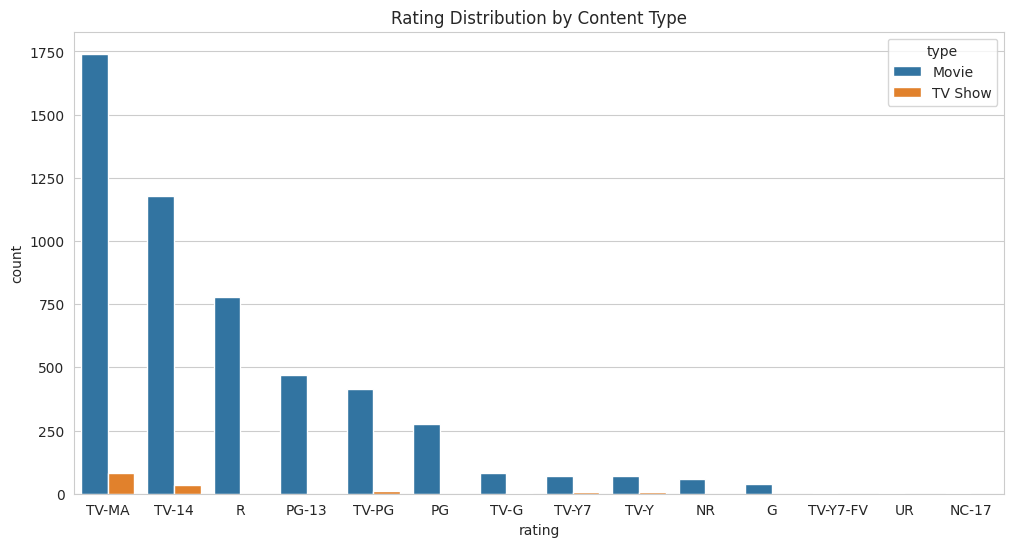

In [31]:
# Is there any difference in ratings distribution between movies and TV shows?
plt.figure(figsize=(12,6))
sns.countplot(x='rating', hue='type', data=netflix_data, order=netflix_data['rating'].value_counts().index)
plt.title("Rating Distribution by Content Type")
plt.show()

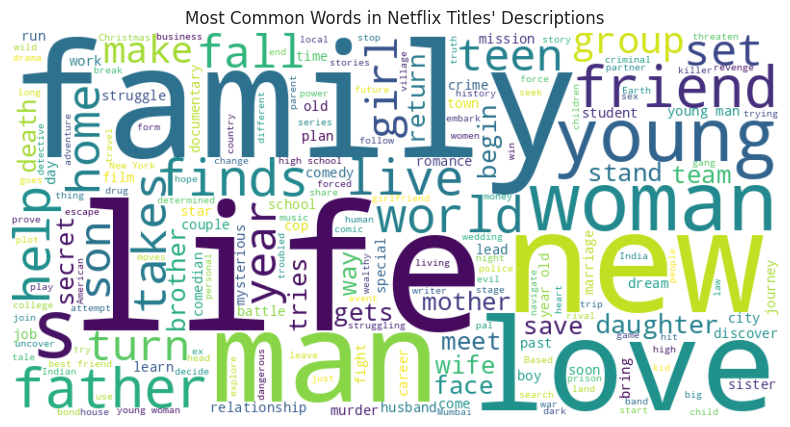

In [32]:
# The most frequent words in descriptions to understand common themes using NLP

from wordcloud import WordCloud
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

text = " ".join(description for description in netflix_data['description'])
wordcloud = WordCloud(stopwords=ENGLISH_STOP_WORDS, background_color="white", width=800, height=400).generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Netflix Titles' Descriptions")
plt.show()

In [33]:
# First, ensure that the missing descriptions are dropped
netflix_data['description'].dropna(inplace=True)

# Joining all descriptions into a single text
text = " ".join(description for description in netflix_data['description'])

# Generate the word cloud
wordcloud = WordCloud(stopwords=ENGLISH_STOP_WORDS, background_color="white").generate(text)

# Extract word frequencies
word_frequencies = wordcloud.process_text(text)

# Sort the frequencies in descending order and get the top words
sorted_word_freq = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

# Display the top words and their frequencies
print("Most Common Words in Netflix Titles' Descriptions:")
for word, freq in sorted_word_freq[:10]:
    print(f"{word}: {freq}")

Most Common Words in Netflix Titles' Descriptions:
life: 482
family: 389
new: 318
love: 308
man: 303
woman: 273
s: 270
young: 267
friend: 236
father: 223


In [42]:
# Now let's try to answer the question below
# "Can we predict if a title is a movie or a TV show based on its description?"

netflix_data = netflix_data.dropna(subset=['description', 'type'])

# For NLP tasks, text often needs to be transformed into a format that's suitable for training models. This can include tokenization, stemming, and vectorization.
# Here, we'll use TfidfVectorizer:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Ensure all descriptions are of string type
netflix_data['description'] = netflix_data['description'].astype(str)
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(netflix_data['description'])

y = netflix_data['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Logistic Regression model for this classification task to train the model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [44]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9699812382739212
              precision    recall  f1-score   support

       Movie       0.97      1.00      0.98      1034
     TV Show       0.00      0.00      0.00        32

    accuracy                           0.97      1066
   macro avg       0.48      0.50      0.49      1066
weighted avg       0.94      0.97      0.96      1066



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
# The overall accuracy is 96.998%. At first glance, this seems excellent. 
# However, when dealing with imbalanced datasets, accuracy can be misleading.
# The model is doing an excellent job of predicting movies but is failing entirely in predicting TV shows.
# The high accuracy of 96.998% is primarily driven by the model's ability to predict the 'Movie' class, which dominates the dataset.
# The model may be choosing the safest option by predicting the majority class for most (or all) instances. This is a common behavior with imbalanced datasets.

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming netflix_data is your DataFrame
netflix_data.dropna(subset=['title', 'listed_in'], inplace=True) # Drop rows with NaN values in title or genre

X_title = netflix_data['title']
y_genre = netflix_data['listed_in']

vectorizer = TfidfVectorizer(max_features=5000)
X_title_transformed = vectorizer.fit_transform(X_title)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_title_transformed, y_genre, test_size=0.2, random_state=42)


In [90]:
# We'll use a RandomForest classifier to predict the genre.

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Checking the accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.1388


In [89]:
def predict_genre(movie_title):
    transformed_title = vectorizer.transform([movie_title])
    predicted_genre = clf.predict(transformed_title)
    return predicted_genre[0]

movie_title = "The Great Escape"
predicted_genre = predict_genre(movie_title)
print(f"The predicted genre for '{movie_title}' is: {predicted_genre}")

The predicted genre for 'The Great Escape' is: Comedies, Dramas, International Movies


In [91]:
# Predicting Rating based on title

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming netflix_data is your DataFrame
netflix_data.dropna(subset=['title', 'rating'], inplace=True) # Drop rows with NaN values in title or rating

X_title = netflix_data['title']
y_rating = netflix_data['rating']

vectorizer = TfidfVectorizer(max_features=5000)
X_title_transformed = vectorizer.fit_transform(X_title)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_title_transformed, y_rating, test_size=0.2, random_state=42)

In [92]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Checking the accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.3743


In [94]:
def predict_rating(movie_title):
    transformed_title = vectorizer.transform([movie_title])
    predicted_rating = clf.predict(transformed_title)
    return predicted_rating[0]

movie_title = "The Great Escape"
predicted_rating = predict_rating(movie_title)
print(f"The predicted rating for '{movie_title}' is: {predicted_rating}")

The predicted rating for 'The Great Escape' is: TV-MA


In [95]:
# Predicting the rating of a movie based on the director 
# We'll treat it as a classification problem assuming the ratings are categorical.

In [100]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming netflix_data is your DataFrame
netflix_data.dropna(subset=['director', 'rating'], inplace=True)  # Drop rows with NaN values in director or rating

X_director = netflix_data['director']
y_rating = netflix_data['rating']

# Encode the director names numerically
label_encoder = LabelEncoder()
X_encoded = label_encoder.fit_transform(X_director)

X_encoded = X_encoded.reshape(-1, 1)  # Reshape to 2D array

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_rating, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [101]:
director_name = "Christopher Nolan"
predicted_rating = predict_rating(director_name)
print(f"The predicted rating for a movie directed by '{director_name}' is: {predicted_rating}")

The predicted rating for a movie directed by 'Christopher Nolan' is: PG-13


In [102]:
# 1. Identify top 10 directors by count of their movies.
top_10_directors = netflix_data['director'].value_counts().head(10).index.tolist()

# 2. Predict ratings for each director.
predicted_ratings = {}
for director in top_10_directors:
    try:
        rating = predict_rating(director)
        predicted_ratings[director] = rating
    except:
        # Handle any director not seen in training data
        predicted_ratings[director] = "Director not in training data or other error."

# Display the predicted ratings
for director, rating in predicted_ratings.items():
    print(f"Predicted rating for movies directed by '{director}': {rating}")

Predicted rating for movies directed by 'Raúl Campos, Jan Suter': TV-MA
Predicted rating for movies directed by 'Marcus Raboy': TV-MA
Predicted rating for movies directed by 'Jay Karas': TV-MA
Predicted rating for movies directed by 'Cathy Garcia-Molina': TV-14
Predicted rating for movies directed by 'Martin Scorsese': R
Predicted rating for movies directed by 'Jay Chapman': TV-MA
Predicted rating for movies directed by 'Youssef Chahine': TV-MA
Predicted rating for movies directed by 'Steven Spielberg': PG
Predicted rating for movies directed by 'Don Michael Paul': R
Predicted rating for movies directed by 'David Dhawan': TV-14


In [103]:
# Given a movie or TV show title, recommend similar titles based on description, director, cast, and other features using similarity measures or recommendation algorithms.

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Combine textual columns for each movie/TV show
netflix_data['combined_features'] = netflix_data['description'].astype(str) + ' ' + netflix_data['director'].astype(str) + ' ' + netflix_data['cast'].astype(str)

# Use TfidfVectorizer to convert textual data into a matrix of token counts
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(netflix_data['combined_features'])

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to get movie/show recommendations
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie/TV show that matches the title
    idx = netflix_data[netflix_data['title'] == title].index[0]

    # Get the pairwise similarity scores of all movies/TV shows with that movie/TV show
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies/TV shows based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies/TV shows
    sim_scores = sim_scores[1:11]

    # Get the movie/TV show indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies/TV shows
    return netflix_data['title'].iloc[movie_indices]

# Test the recommendation system
title_to_recommend_from = "Inception"
recommended_titles = get_recommendations(title_to_recommend_from)
print(f"Recommendations for {title_to_recommend_from}:")
print(recommended_titles)

Recommendations for Inception:
5294                                     Brother's Shadow
901                                         Deadly Switch
8226                                         The Break-Up
6195    Attacking the Devil: Harold Evans and the Last...
6942                                           Havenhurst
8075                Spy Kids 2: The Island of Lost Dreams
6593                      Denis Leary: No Cure For Cancer
6006                                              28 Days
4789                                       King of Peking
2769                       There's Something in the Water
Name: title, dtype: object


In [105]:
# How long will a movie or tv show be?
# Linear Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Handle missing values
netflix_data['description'].fillna("", inplace=True)
netflix_data['director'].fillna("", inplace=True)
netflix_data['cast'].fillna("", inplace=True)

# Ensure only movies are taken for prediction (TV Show durations are generally in terms of seasons)
netflix_data_movies = netflix_data[netflix_data['type'] == 'Movie']

# Extracting numerical value of duration
netflix_data_movies['duration'] = netflix_data_movies['duration'].str.replace(' min', '').astype(int)

# Define features and target variable
X = netflix_data_movies[['description', 'director', 'cast']]
y = netflix_data_movies['duration']

# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('desc', TfidfVectorizer(stop_words='english'), 'description'),
        ('dir', OneHotEncoder(handle_unknown='ignore'), ['director']),
        ('cast', TfidfVectorizer(stop_words='english'), 'cast')
    ])

# Create and train the regression model
model = make_pipeline(preprocessor, LinearRegression())
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

# Predict duration for a new input
def predict_duration(description, director, cast):
    return model.predict(pd.DataFrame({'description': [description], 'director': [director], 'cast': [cast]}))[0]

# Test the function
sample_description = "A thief who steals corporate secrets through the use of dream-sharing technology is given the inverse task of planting an idea into the mind of a CEO."
sample_director = "Christopher Nolan"
sample_cast = "Leonardo DiCaprio, Joseph Gordon-Levitt"
predicted_duration = predict_duration(sample_description, sample_director, sample_cast)
print(f"Predicted Duration: {predicted_duration} minutes")

/tmp/ipykernel_32/458429896.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_data_movies['duration'] = netflix_data_movies['duration'].str.replace(' min', '').astype(int)


Mean Absolute Error: 14.03135205746076
Mean Squared Error: 376.4511145813749
Predicted Duration: 118.31148717377354 minutes


In [ ]:
# Concluding Interpretation:
# The Netflix dataset, rich in textual and categorical features, offers a multitude of analysis and prediction opportunities. 
# While our explorations were foundational, they underscore the importance of data preprocessing, the power of textual data, and the versatility of machine learning models.
# The challenges we encountered highlight the intricacies of real-world data science tasks, from dealing with missing values and high cardinality features to ensuring consistency in model input. 
# The recommendation and prediction tasks we delved into are quintessential to the core operations of streaming platforms like Netflix. With more sophisticated models, feature engineering, and larger datasets, one can build robust systems that can significantly enhance user experience and business operations